In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c lish-moa

 99% 64.0M/64.7M [00:04<00:00, 14.5MB/s]
100% 64.7M/64.7M [00:04<00:00, 14.1MB/s]


In [6]:
!unzip lish-moa.zip

Archive:  lish-moa.zip
  inflating: sample_submission.csv   
  inflating: test_features.csv       
  inflating: train_drug.csv          
  inflating: train_features.csv      
  inflating: train_targets_nonscored.csv  
  inflating: train_targets_scored.csv  


# 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_features = pd.read_csv('train_features.csv')
train_targets_scored = pd.read_csv('train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('train_targets_nonscored.csv')
test_features = pd.read_csv('test_features.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train_features.shape

(23814, 876)

In [4]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [5]:
train_features.sig_id.nunique()

23814

In [6]:
train_features.cp_type.value_counts()

cp_type
trt_cp         21948
ctl_vehicle     1866
Name: count, dtype: int64

In [7]:
train_features.cp_time.value_counts()

cp_time
48    8250
72    7792
24    7772
Name: count, dtype: int64

In [8]:
train_features.cp_dose.value_counts()

cp_dose
D1    12147
D2    11667
Name: count, dtype: int64

In [9]:
train_targets_scored.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_targets_scored.sum()[1:].sort_values()

atp-sensitive_potassium_channel_antagonist      1
erbb2_inhibitor                                 1
diuretic                                        6
autotaxin_inhibitor                             6
protein_phosphatase_inhibitor                   6
                                             ... 
serotonin_receptor_antagonist                 404
dopamine_receptor_antagonist                  424
cyclooxygenase_inhibitor                      435
proteasome_inhibitor                          726
nfkb_inhibitor                                832
Length: 206, dtype: object

In [11]:
train_features[:1]

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.012,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176


In [12]:
train_features[:1][[col for col in train_features.columns if 'g-' in col]]

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
0,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.012,-1.022,-0.0326,0.5548,-0.0921,...,-0.5055,-0.3167,1.093,0.0084,0.8611,-0.5582,0.3008,1.649,0.2968,-0.0224


In [13]:
gs = train_features[:1][[col for col in train_features.columns if 'g-' in col]].values.reshape(-1, 1)

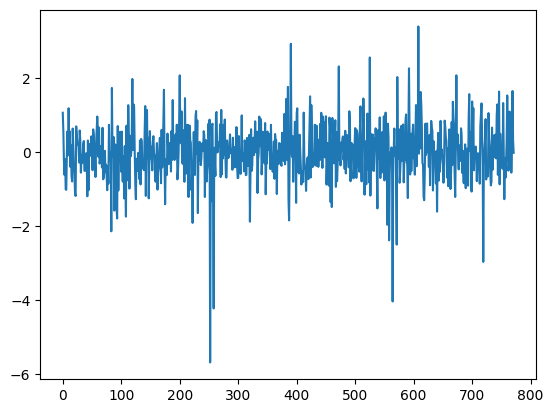

In [14]:
plt.plot(gs)

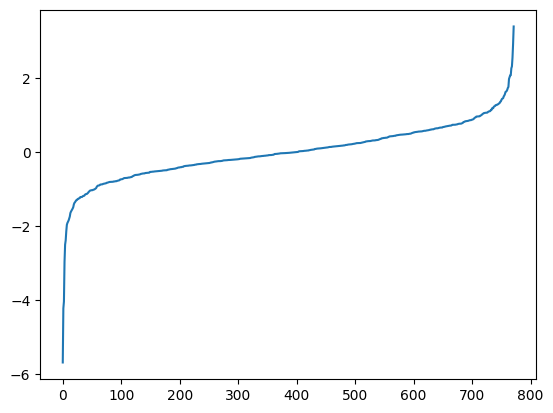

In [15]:
plt.plot(sorted(gs))

<Axes: ylabel='Frequency'>

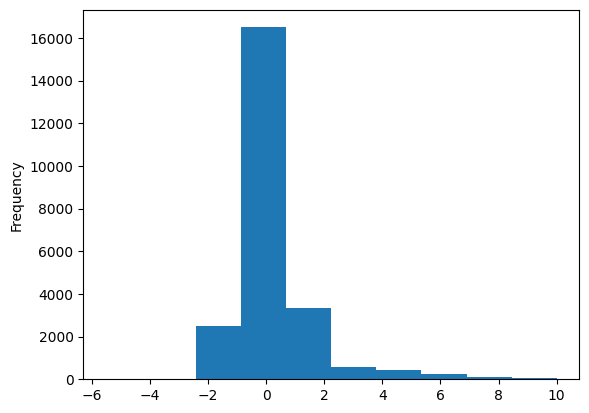

In [16]:
train_features['g-0'].plot(kind='hist')

<Axes: ylabel='Frequency'>

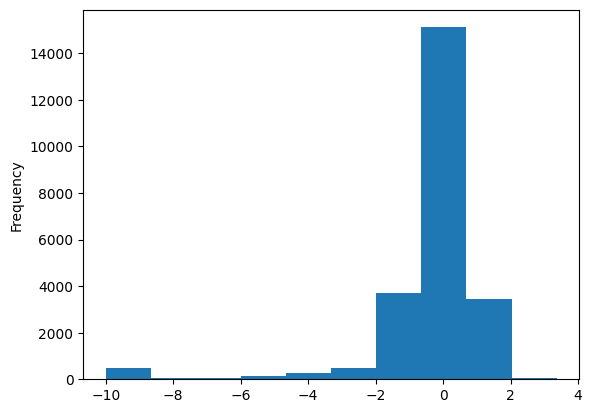

In [17]:
train_features['c-0'].plot(kind='hist')

In [18]:
train_features = pd.concat([train_features, pd.get_dummies(train_features['cp_time'], prefix='cp_time')], axis=1)
train_features = pd.concat([train_features, pd.get_dummies(train_features['cp_dose'], prefix='cp_dose')], axis=1)
train_features = pd.concat([train_features, pd.get_dummies(train_features['cp_type'], prefix='cp_type')], axis=1)
train_features.drop(['cp_time', 'cp_dose', 'cp_type'], axis=1)
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-97,c-98,c-99,cp_time_24,cp_time_48,cp_time_72,cp_dose_D1,cp_dose_D2,cp_type_ctl_vehicle,cp_type_trt_cp
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2139,0.3801,0.4176,True,False,False,True,False,False,True
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0.1241,0.6077,0.7371,False,False,True,True,False,False,True
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.2187,-1.4080,0.6931,False,True,False,True,False,False,True
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-0.8784,-0.3876,-0.8154,False,True,False,True,False,False,True
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.2885,-0.3786,0.7125,False,False,True,False,True,False,True


## 2. Model

In [42]:
# Print the first few rows and the shape of your data
print("train_features.head():")
print(train_features.head())

print("train_features.shape:")
print(train_features.shape)

print("train_targets_scored.head():")
print(train_targets_scored.head())

print("train_targets_scored.shape:")
print(train_targets_scored.shape)

train_features.head():
         sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-97    c-98    c-99  cp_time_24  cp_time_48  \
0 -0.1944 -1.0120  ...  0.2139  0.3801  0.4176        True       False   
1  1.0190  0.5207  ...  0.1241  0.6077  0.7371       False       False   
2 -0.0323  1.2390  ... -0.2187 -1.4080  0.6931       False        True   
3  4.0620 -0.8095  ... -0.8784 -0.3876 -0.8154       False        True   
4  1.4180 -0.8244  ...  0.2885 -0.3786  0.7125       False       False   

   cp_time_72  cp_dose_D1  cp_dose_D2  cp_type_ctl_vehicle  cp_type_trt_cp 

In [50]:
print(train_features.dtypes)
print(train_targets_scored.dtypes)
print(train_features.head())
print(train_targets_scored.head())

sig_id                  object
cp_type                 object
cp_time                  int64
cp_dose                 object
g-0                    float64
                        ...   
cp_time_72                bool
cp_dose_D1                bool
cp_dose_D2                bool
cp_type_ctl_vehicle       bool
cp_type_trt_cp            bool
Length: 883, dtype: object
sig_id                                   object
5-alpha_reductase_inhibitor               int64
11-beta-hsd1_inhibitor                    int64
acat_inhibitor                            int64
acetylcholine_receptor_agonist            int64
                                          ...  
ubiquitin_specific_protease_inhibitor     int64
vegfr_inhibitor                           int64
vitamin_b                                 int64
vitamin_d_receptor_agonist                int64
wnt_inhibitor                             int64
Length: 207, dtype: object
         sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0

In [58]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns to encode
categorical_cols = ['cp_type', 'cp_time', 'cp_dose']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity

# Apply the encoder to the categorical columns
encoded_features = encoder.fit_transform(train_features[categorical_cols])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and add the encoded columns
numeric_features = train_features.drop(columns=categorical_cols).reset_index(drop=True)
train_features_preprocessed = pd.concat([numeric_features, encoded_df], axis=1)

# Check the shape and first few rows of the preprocessed features
print(train_features_preprocessed.shape)
print(train_features_preprocessed.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(23814, 884)
         sig_id     g-0     g-1     g-2     g-3     g-4     g-5     g-6  \
0  id_000644bb2  1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220   
1  id_000779bfc  0.0743  0.4087  0.2991  0.0604  1.0190  0.5207  0.2341   
2  id_000a6266a  0.6280  0.5817  1.5540 -0.0764 -0.0323  1.2390  0.1715   
3  id_0015fd391 -0.5138 -0.2491 -0.2656  0.5288  4.0620 -0.8095 -1.9590   
4  id_001626bd3 -0.3254 -0.4009  0.9700  0.6919  1.4180 -0.8244 -0.2800   

      g-7     g-8  ...  cp_time_48  cp_time_72  cp_dose_D1  cp_dose_D2  \
0 -0.0326  0.5548  ...       False       False        True       False   
1  0.3372 -0.4047  ...       False        True        True       False   
2  0.2155  0.0065  ...        True       False        True       False   
3  0.1792 -0.1321  ...        True       False        True       False   
4 -0.1498 -0.8789  ...       False        True       False        True   

   cp_type_ctl_vehicle  cp_type_trt_cp  cp_type_trt_cp  cp_time_48  \
0                Fals

In [59]:
# Drop duplicate columns if any
train_features_preprocessed = train_features_preprocessed.loc[:, ~train_features_preprocessed.columns.duplicated()]

# Check the cleaned shape and first few rows
print(train_features_preprocessed.shape)
print(train_features_preprocessed.head())

(23814, 880)
         sig_id     g-0     g-1     g-2     g-3     g-4     g-5     g-6  \
0  id_000644bb2  1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220   
1  id_000779bfc  0.0743  0.4087  0.2991  0.0604  1.0190  0.5207  0.2341   
2  id_000a6266a  0.6280  0.5817  1.5540 -0.0764 -0.0323  1.2390  0.1715   
3  id_0015fd391 -0.5138 -0.2491 -0.2656  0.5288  4.0620 -0.8095 -1.9590   
4  id_001626bd3 -0.3254 -0.4009  0.9700  0.6919  1.4180 -0.8244 -0.2800   

      g-7     g-8  ...    c-97    c-98    c-99  cp_time_24  cp_time_48  \
0 -0.0326  0.5548  ...  0.2139  0.3801  0.4176        True       False   
1  0.3372 -0.4047  ...  0.1241  0.6077  0.7371       False       False   
2  0.2155  0.0065  ... -0.2187 -1.4080  0.6931       False        True   
3  0.1792 -0.1321  ... -0.8784 -0.3876 -0.8154       False        True   
4 -0.1498 -0.8789  ...  0.2885 -0.3786  0.7125       False       False   

   cp_time_72  cp_dose_D1  cp_dose_D2  cp_type_ctl_vehicle  cp_type_trt_cp  
0       False 

In [28]:
!pip install pytorch-lightning

In [51]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [52]:
# Custom Dataset Class
class MoADataset(Dataset):
    def __init__(self, dataset, targets):
        self.dataset = dataset
        self.targets = targets

    def __len__(self):
        return self.dataset.shape[0]

    def __getitem__(self, index):
        # Convert dataset and targets to numpy arrays if they are not already
        x = self.dataset[index].astype(np.float32)
        y = self.targets[index].astype(np.float32)

        # Convert to PyTorch tensors
        x_tensor = torch.tensor(x, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32)

        return {'x': x_tensor, 'y': y_tensor}

In [53]:
# Model Architecture
class Model(nn.Module):
    def __init__(self, num_features, num_targets):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1024),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.3),
            nn.PReLU(),
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.3),
            nn.PReLU(),
            nn.Linear(1024, num_targets)
        )

    def forward(self, x):
        return self.model(x)

In [60]:
# Data Module
class MoADataModule(pl.LightningDataModule):
    def __init__(self, data, targets, batch_size=1024):
        super(MoADataModule, self).__init__()
        self.data = data.drop(columns=['sig_id'])  # Drop the 'sig_id' column here
        self.targets = targets
        self.batch_size = batch_size

    def prepare_data(self):
        pass

    def setup(self, stage=None):
        # Convert the data to numpy arrays with float32 dtype
        feature_data = self.data.values.astype(np.float32)
        target_data = self.targets.iloc[:, 1:].values.astype(np.float32)  # Exclude 'sig_id'

        # Split the data into training and validation sets
        train_data, valid_data, train_targets, valid_targets = train_test_split(
            feature_data, target_data, test_size=0.1, random_state=42
        )

        # Create datasets for PyTorch DataLoader
        self.train_dataset = MoADataset(train_data, train_targets)
        self.valid_dataset = MoADataset(valid_data, valid_targets)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=4)

    def val_dataloader(self):
        return DataLoader(self.valid_dataset, batch_size=self.batch_size, shuffle=False, num_workers=4)

In [61]:
# Lightning Module
class LitMoA(pl.LightningModule):
    def __init__(self, model):
        super(LitMoA, self).__init__()
        self.model = model
        self.criterion = nn.BCEWithLogitsLoss()

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, threshold=1e-5, mode='min', verbose=True)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler, 'monitor': 'valid_loss'}

    def training_step(self, batch, batch_idx):
        x, y = batch['x'], batch['y']
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch['x'], batch['y']
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('valid_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def on_train_epoch_end(self):
        avg_loss = torch.stack([output['loss'] for output in self.trainer.train_dataloader_outputs]).mean()
        self.log('avg_train_loss', avg_loss, prog_bar=True)

    def on_validation_epoch_end(self):
        avg_loss = torch.stack([output['loss'] for output in self.trainer.val_dataloader_outputs]).mean()
        self.log('avg_valid_loss', avg_loss, prog_bar=True)

In [62]:
# Define the model and datamodule
net = Model(num_features=882, num_targets=206)
model = LitMoA(model=net)
dm = MoADataModule(data=train_features, targets=train_targets_scored)

In [63]:
trainer = pl.Trainer(accelerator='gpu', devices=1, max_epochs=5)
trainer.fit(model, dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


ValueError: could not convert string to float: 'trt_cp'

# 2. Split Data

### Cross Validation Scheme

In [24]:
!pip install iterative-stratification

In [25]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [26]:
train_targets_scored.loc[:, 'kfold'] = -1
train_targets_scored = train_targets_scored.sample(frac=1).reset_index(drop=True)
targets = train_targets_scored.drop('sig_id', axis=1).values

mskf = MultilabelStratifiedKFold(n_splits=5)
for fold_, (trn_, val_) in enumerate(mskf.split(X=train_targets_scored, y=targets)):
    train_targets_scored.loc[val_, 'kfold'] = fold_

train_targets_scored.to_csv('train_folds.csv', index=False)

### Utils

In [27]:
from typing_extensions import final
import torch
import torch.nn as nn

class MoaDataset:
    def __init__(self, dataset, features):
        self.dataset = dataset
        self.features = features

    def __len__(self):
        return self.dataset.shape[0]

    def __getitem__(self, item):
        return {
            'x': torch.tensor(self.dataset[item, :].values, dtype=torch.float),
            'y': torch.tensor(self.dataset[item, :].values, dtype=torch.float)
        }

class Engine:
  def __init__(self, model, optimizer, device):
    self.model = model
    self.optimizer = optimizer
    self.device = device

  @staticmethod
  def loss_fn(targets, outputs):
    return nn.BCEWithLogitsLoss()(outputs, targets)

  def train(self, data_loader):
    self.model.train()
    final_loss = 0
    for data in data_loader:
      self.optimizer.zero_grad()
      inputs = data['x'].to(self.device)
      targets = data['y'].to(self.device)
      outputs = self.model(inputs)
      loss = self.loss_fn(targets, outputs)
      loss.backward()
      self.optimizer.step()
      final_loss += loss.item()
    return final_loss / len(data_loader)

  def validate(self, data_loader):
    self.model.eval()
    final_loss = 0
    for data in data_loader:
      inputs = data['x'].to(self.device)
      targets = data['y'].to(self.device)
      outputs = self.model(inputs)
      loss = self.loss_fn(targets, outputs)
      final_loss += loss.item()
    return final_loss / len(data_loader)

def add_dummies(data, column):
  ohe = pd.get_dummies(data[column])
  ohe_columns = [f"{column}_{c}" for c in ohe_columns]
  ohe.columns = ohe_columns
  data = data.drop(column, axis=1)
  data = data.join(ohe)
  return data

def process_data(df):
  df = add_dummies(df, 'cp_time')
  df = add_dummies(df, 'cp_dose')
  df = add_dummies(df, 'cp_type')
  return df

class Model(nn.Module):
  def __init__(self, num_features, num_targets):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 256),
        nn.BatchNorm1d(256),
        nn.Dropout(0.3),
        nn.Linear(num_features, 256),
        nn.BatchNorm1d(256),
        nn.Dropout(0.3),
        nn.Linear(num_features, 256),
        nn.BatchNorm1d(256),
        nn.Dropout(0.3),
        nn.Linear(256, num_targets)
    )

  def forward(self, x):
    return self.model(x)

### Train

In [28]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS = 100

def run_training(fold):
  df = pd.read_csv('train_features.csv')
  df = process_data(df)
  folds = pd.read_csv('train_folds.csv')

  targets = folds.drop(['sig_id', 'kfold'], axis=1).columns
  features = df.drop(['sig_id'], axis=1).columns

  df = df.merge(folds, on='sig_id', how='left')

  train_df = df[df.kfold != fold].reset_index(drop=True)
  valid_df = df[df.kfold == fold].reset_index(drop=True)

  x_train = train_df[features].to_array()
  x_valid = valid_df[features].to_array()

  y_train = train_df[targets].to_array()
  y_valid = valid_df[targets].to_array()

  train_dataset = MoaDataset(x_train, y_train)
  train_dataloader = torch.utils.data.DataLoader(
      train_dataset,
      batch_size=1024,
      num_workers=8
  )

  model = Model(...)
  model.to(DEVICE)

  optimizer = torch.optim.Adam(
      model.parameters(),
      lr=3e-4
  )

  # scheduler
  eng = Engine(model, optimizer, DEVICE)

  for _ in range(EPOCHS):
    train_loss = eng.train(train_loss)
    # valid_loss = ...